# Crash Course in Causality: Data Preparation for Causal Analysis in Machine Learning

Name: ChengYen Lai  
NUID: 002776864

## Abstract

In this chapter, we will explore the critical role of data preparation in causal analysis for machine learning. Readers will learn key data preprocessing techniques necessary for accurate causal modeling, including handling missing data, feature selection, and encoding categorical variables. We will also examine how these techniques fit within a causal framework to improve the interpretation and robustness of machine learning models.

---

## Theory Section

### 1. Causality Principles in Machine Learning

Causality refers to the relationship between cause and effect. Understanding causality is crucial for interpreting the results of machine learning models, as it helps distinguish between correlation and true causal relationships. Key concepts include:

- **Causal inference**: The process of determining causal relationships from data.
- **Counterfactuals**: Hypothetical scenarios used to assess causal effects.
- **Confounding variables**: Variables that influence both the treatment and outcome, leading to biased results.
- **Causal graphs**: Visual representations of causal relationships, commonly expressed using Directed Acyclic Graphs (DAGs).

<center>
<img src="image/causal.png" width=400 />    
</center>


### 2. Data Preprocessing Techniques

Proper data preprocessing ensures that the model accurately captures causal relationships, rather than spurious correlations. Key steps include:

#### 2.1 Handling Missing Data

Missing data can undermine causal inference if not handled properly. Strategies include:

- **Imputation**: Filling missing values based on other available data (mean, median, or predictive models).
- **Deletion**: Removing rows or columns with missing data (may introduce bias if the missingness is not random).

#### 2.2 Feature Selection

Feature selection aims to retain relevant variables that genuinely contribute to explaining the causal effect, while discarding irrelevant or redundant features. Methods include:

- **Filter methods**: Use statistical tests to evaluate feature relevance.
- **Wrapper methods**: Use machine learning algorithms to assess the performance of different feature subsets.
- **Embedded methods**: Feature selection integrated within the learning algorithm, such as Lasso regression.

#### 2.3 Encoding Categorical Variables

Categorical variables need to be encoded for use in machine learning models. Common techniques include:

- **One-hot encoding**: Representing each category as a separate binary column.
- **Label encoding**: Assigning a unique integer to each category.

#### 2.4 Causal Data Transformations

To support causal analysis, transformations might be required:

- **Instrumental Variables**: Used to address confounding by introducing external variables that only affect the treatment.
- **Propensity Score Matching**: Balancing the treated and control groups by matching them based on similar covariates.

## Practical Code Examples

### 1. Handling Missing Data

We will demonstrate handling missing data through imputation and deletion techniques.

In [12]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Example dataset with missing values
data = {'Feature1': [1, 2, None, 4, 5], 'Feature2': [None, 2, 3, None, 5]}
df = pd.DataFrame(data)

# Imputation strategy: mean for numerical features
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Display imputed data
df_imputed

,Feature1,Feature2
0,1.0,3.333333
1,2.0,2.000000
2,3.0,3.000000
3,4.0,3.333333
4,5.0,5.000000


### 2. Feature Selection

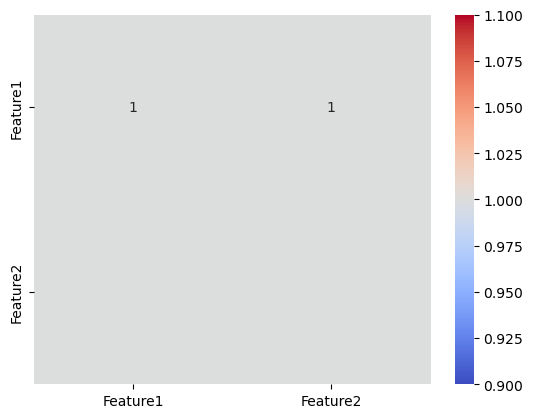

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### 3. Encoding Categorical Variables

In [16]:
df_categorical = pd.DataFrame({'Category': ['A', 'B', 'A', 'C', 'B']})

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_categorical, columns=['Category'])

# Display encoded data
df_encoded

,Category_A,Category_B,Category_C
0,True,False,False
1,False,True,False
2,True,False,False
3,False,False,True
4,False,True,False


## Real World Application

#### Causal Inference with DoWhy
DoWhy is a Python package specifically designed for causal inference, providing a simple interface for causal analysis, where you can specify causal models, perform identification, estimation, and refutation (testing the robustness of causal conclusions)

#### 1. Installing DoWhy

In [3]:
pip install dowhy

Note: you may need to restart the kernel to use updated packages.


#### 2. Example: Understanding Causality with DoWhy
We will create a simple causal model to study how **advertising** (as a treatment) affects **sales** (as the outcome). We will assume that there is a causal relationship between advertising and sales, and we’ll use DoWhy to model and estimate this causal effect

**Step 1: Create a Simulated Dataset**  
Start by simulating some data. Create two variables:

- **Advertising Spend** (as a treatment variable).
- **Sales** (as the outcome).
- Add a confounder **Weather**, which affects both **Advertising Spend** and **Sales**

In [23]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Simulate data for the example
n = 1000  # number of observations
weather = np.random.uniform(0, 1, n)  # confounder: Weather
advertising_spend = np.random.normal(10, 2, n)  # treatment: Advertising Spend
sales = 5 + 3 * advertising_spend + 2 * weather + np.random.normal(0, 5, n)  # outcome: Sales

# Create a DataFrame
data = pd.DataFrame({
    'AdvertisingSpend': advertising_spend,
    'Sales': sales,
    'Weather': weather
})

# Display first few rows of the dataset
data.head()

,AdvertisingSpend,Sales,Weather
0,10.355402,29.783699,0.374540
1,7.329311,28.473835,0.950714
2,10.760396,31.221573,0.731994
3,11.221171,43.661111,0.598658
4,11.119581,39.082979,0.156019


**Step 2: Specify the Causal Model**

In causal inference, we use a **causal graph** to represent the relationships between variables. In our case, we assume that **Advertising Spend** directly affects **Sales**, and both **Advertising Spend** and **Sales** are influenced by the **Weather**

We will use DoWhy to specify the causal model:

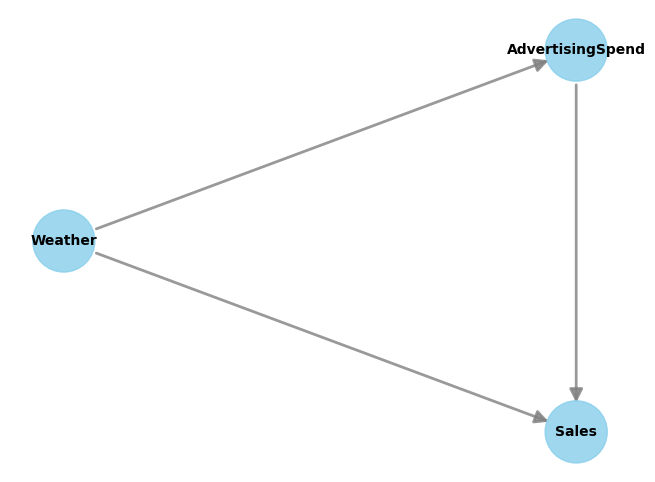

In [25]:
import dowhy

# Specify the causal graph
causal_graph = """
digraph {
  Weather -> AdvertisingSpend;
  Weather -> Sales;
  AdvertisingSpend -> Sales;
}
"""

# Create a DoWhy causal model
model = dowhy.CausalModel(
    data=data,
    treatment='AdvertisingSpend',
    outcome='Sales',
    graph=causal_graph
)

# Visualize the causal graph
model.view_model()

Here, we define the relationships in a **causal graph** (using the **DOT language**), where:

- **Weather** affects both **Advertising Spend** and **Sales** (confounding effect).
- **Advertising Spend** affects **Sales** (causal effect we are interested in).

**Step 3: Identify the Causal Effect**

After specifying the model, the next step is to identify the causal effect. **Identification** refers to determining if and how we can estimate the causal effect from the available data

In [27]:
# Identify the causal effect
identified_estimand = model.identify_effect()

# Print the identified estimand (which method is being used to estimate the effect)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                           
───────────────────(E[Sales|Weather])
d[AdvertisingSpend]                  
Estimand assumption 1, Unconfoundedness: If U→{AdvertisingSpend} and U→Sales then P(Sales|AdvertisingSpend,Weather,U) = P(Sales|AdvertisingSpend,Weather)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



**Step 4: Estimate the Causal Effect**

Now that we’ve identified the causal effect, we can use different methods to estimate it. Here, we’ll use a **linear regression model** to estimate the Average Treatment Effect (ATE)

In [31]:
# Estimate the causal effect using backdoor adjustment and linear regression
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.linear_regression")

# Print the estimated causal effect
print("Estimated Causal Effect (Linear Regression):")
print(estimate)

Estimated Causal Effect (Linear Regression):
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                           
───────────────────(E[Sales|Weather])
d[AdvertisingSpend]                  
Estimand assumption 1, Unconfoundedness: If U→{AdvertisingSpend} and U→Sales then P(Sales|AdvertisingSpend,Weather,U) = P(Sales|AdvertisingSpend,Weather)

## Realized estimand
b: Sales~AdvertisingSpend+Weather
Target units: ate

## Estimate
Mean value: 2.960648951573801



/opt/anaconda3/lib/python3.11/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


**Step 5: Perform a Refutation**

Finally, we perform a **refutation** to test the robustness of the estimated causal effect. We’ll use the **placebo treatment refuter** to check if the effect holds under different assumptions

In [34]:
# Perform a refutation using placebo treatment
refutation = model.refute_estimate(identified_estimand, estimate,
                                   method_name="placebo_treatment_refuter")

# Print the refutation results
print("\nRefutation Results:")
print(refutation)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/opt/anaconda3/lib/python3.11/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/opt/anaconda3/lib/python3.11/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consi


Refutation Results:
Refute: Use a Placebo Treatment
Estimated effect:2.960648951573801
New effect:0.0
p value:1.0



/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/opt/anaconda3/lib/python3.11/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/opt/anaconda3/lib/python3.11/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consi

The refutation test with the placebo treatment confirms the robustness of the causal inference. The estimated effect of **Advertising Spend** on **Sales** is likely a true causal relationship, and not an artifact or false positive caused by confounding variables or random chance.

## Conclusion

In this chapter, we highlighted essential data preparation techniques crucial for causal analysis in machine learning. Proper handling of missing data, feature selection, and encoding of categorical variables ensures that models are robust and capable of revealing true causal relationships rather than misleading correlations. Effective preprocessing not only improves model performance but also facilitates more accurate causal inference, empowering better decision-making from data.

## References

- Pearl, J. (2009). Causality: Models, Reasoning, and Inference. Cambridge University Press.
- Hernán, M. Á., & Robins, J. M. (2020). Causal Inference: What If. Chapman & Hall/CRC.
- "Data Preprocessing in Python." (2021)

## License

This notebook is licensed under the MIT License. You are free to reuse, modify, and distribute the content, provided that appropriate credit is given to the authors and any modifications are noted.

video link :https://drive.google.com/file/d/1b6GYZE3z8LoR3P7zMmZTtgeJucdrLlZU/view?usp=sharing